In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

data

In [2]:
doclist = []
classlist = []
data1 = open('prepare.txt','r').read()
data2 = open('other.txt','r').read()
data_catalyst_pre = re.split(r'\n',data1)
data_other = re.split(r'\n',data2)

In [3]:
datalist = []
classlist = []
for i in range(len(data_catalyst_pre)):
    data1 = data_catalyst_pre[i]
    datalist.append(data1)
    classlist.append(1)
for j in range(len(data_other)):
    data2 = data_other[j]
    datalist.append(data2)
    classlist.append(0)

In [4]:
X = datalist
Y = classlist

train

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)


In [6]:

vectorizer = TfidfVectorizer(lowercase=False,encoding='latin-1')
x_train2 = vectorizer.fit_transform(d for d in x_train)
y_train2 = y_train

x_test2 = vectorizer.transform(s for s in x_test)
y_test2 = y_test

In [7]:
clf2 = MultinomialNB(alpha=0.0001)
clf2.fit(x_train2,y_train2)
y_pred = clf2.predict(x_test2)
train_score = clf2.score(x_train2,y_train2)
test_score = clf2.score(x_test2,y_test2)
print('train score: {0}'.format(train_score))
print('test score:{0}'.format(test_score))

train score: 0.9848484848484849
test score:0.9696969696969697


In [ ]:
from sklearn.metrics import classification_report
print(clf2)
print(classification_report(y_test2,y_pred))

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred,labels=[0,1])
print('confusion matrix: ')
print(cm)

confusion matrix: 
[[15  0]
 [ 1 17]]


Text(38.25, 0.5, 'true')

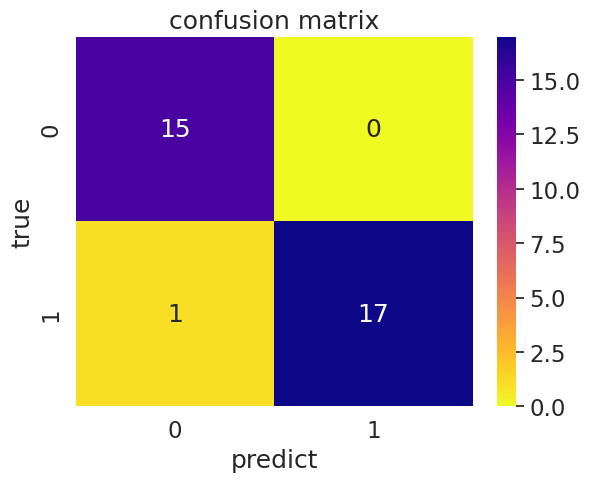

In [10]:
import seaborn as sns
sns.set(font_scale=1.5)
f,ax = plt.subplots()
sns.heatmap(cm,annot=True,cmap='plasma_r')
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

learning_curve

In [11]:
from sklearn.model_selection import validation_curve,learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

<module 'matplotlib.pyplot' from '/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/matplotlib/pyplot.py'>

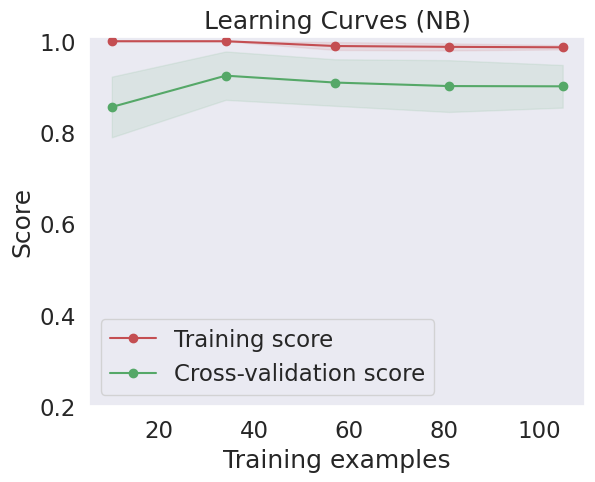

In [12]:
X, y = x_train2, y_train2


title = "Learning Curves (NB)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MultinomialNB(alpha=0.0001)
plot_learning_curve(estimator, title, X, y, ylim=(0.2, 1.01), cv=5, n_jobs=4)